In [1]:
import numpy as np
from pymatgen import Composition, Element
#build NN using tensorflow
#use one hiddlen layer, calculate the error and loss
#split the dataset to about 80% 10% 10%(or less, boundry condition) as training, validation and test set.

In [2]:
#get main group elements list
with open("elements_list_main.txt", "r") as text_file:
    a=text_file.read()
main_group_list=a.split()

In [3]:
#load vectors(from SVD_20)
F=np.loadtxt('aed_svd_20rep.txt')

In [4]:
#load formation energy as a dictionary
with open("formation_energy_dataset.txt", "r") as text_file:
    diction=text_file.read()
di=diction.split()
formation_dict={}
for i in range(len(di)):
    if i%2==0:
        formation_dict[di[i]]=di[i+1]

In [5]:
#build input vector(20vectors*4elements=80vectors)
#vector_input.shape=[5628,20]
vector_input=np.zeros((len(formation_dict),F.shape[1]*4))

formula_number=0
test_string_list=[]
for formula in formation_dict:
    vector=np.zeros((F.shape[1]*4))
    
    compound=Composition(formula)
    element_list=[]
    for element in compound:
        element_list.append(str(element))
    
    #sort element_list by the number of elements
    element_list_sorted=sorted(element_list,key=lambda s: compound[s])
    #build vector
    #test sort result
    formula_string=""
    element_order=0
    for element in element_list_sorted:
        formula_string+=str(element)+str(int(compound[element]))
        for j in range(len(main_group_list)):
            if str(element)==main_group_list[j]:
                #print(j)
                #print(F[j,:])
                vector[element_order*F.shape[1]:(element_order+1)*F.shape[1]]=F[j,:]
                #print(len(vector))
        element_order+=1
    #print(vector)
    vector_input[formula_number,:]=vector
    test_string_list.append(formula_string)
    formula_number+=1

#build success, input vector=vector_input 5628*80

In [6]:
vector_input.shape

(5628, 80)

In [7]:
#build formula and energy list
formula_list=[]
energy_list=[]
for formula in formation_dict:
    energy_list.append(formation_dict[formula])

for formula in test_string_list:
    formula_list.append(formula)
#build success, energy list=energy_list 5628
#build success, formula list=formula_list 5628
print(len(energy_list))
print(len(formula_list))

5628
5628


In [8]:
##store the dataset in file
#1.store the formula_list and energy_list to formation_energy_formula.txt

#with open("FE_TRUE.txt", "w") as text_file:
    #for i in range(len(formula_list)):
        #text_file.write(formula_list[i]+" "+energy_list[i]+"\n")
        
#2. store the vector_input in SVD_20_INPUT.txt
np.savetxt("AD_600_SVD_20.txt",vector_input)

In [9]:
#build index number list
index_list=list(range(len(formula_list)))
#shuffle index_list
np.random.shuffle(index_list)

split_percent=[0.8,0.1,0.1]
boundry1=int(len(index_list)*split_percent[0])
boundry2=int(len(index_list)*(split_percent[1]+split_percent[0]))

#build split-index matrix
traning_index=index_list[:boundry1]
validation_index=index_list[boundry1:boundry2]
test_index=index_list[boundry2:]

#test split lenth
print(len(traning_index))
print(len(validation_index))
print(len(test_index))

4502
563
563


In [10]:
#vector=vector_input 5628*80
#energy list=energy_list 5628 (string array, to be transformed to numpy array, dtype=np.double)
#formula list=formula_list 5628

In [11]:
training_x=vector_input[traning_index,:]
validation_x=vector_input[validation_index,:]
test_x=vector_input[test_index,:]

#trasform energy_list(string list) to numpy, dtype=np.double
energy_array=np.array(energy_list,dtype=np.double)

training_y=energy_array[traning_index]
validation_y=energy_array[validation_index]
test_y=energy_array[test_index]

#training_x
#training_y
#validation_x
#validation_y
#test_x
#test_y

In [33]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae', 'acc'])

history=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
evaluation=model.evaluate(validation_x, validation_y)

Train on 4502 samples, validate on 563 samples
Epoch 1/1000
4502/4502 [==============================] - 2s 398us/step - loss: 7.3155 - mean_absolute_error: 7.3155 - acc: 0.0000e+00 - val_loss: 6.2234 - val_mean_absolute_error: 6.2234 - val_acc: 0.0000e+00
Epoch 2/1000
4502/4502 [==============================] - 0s 107us/step - loss: 5.7561 - mean_absolute_error: 5.7561 - acc: 0.0000e+00 - val_loss: 5.4249 - val_mean_absolute_error: 5.4249 - val_acc: 0.0000e+00
Epoch 3/1000
4502/4502 [==============================] - 0s 83us/step - loss: 5.1572 - mean_absolute_error: 5.1572 - acc: 0.0000e+00 - val_loss: 5.0494 - val_mean_absolute_error: 5.0494 - val_acc: 0.0000e+00
Epoch 4/1000
4502/4502 [==============================] - 1s 112us/step - loss: 4.8316 - mean_absolute_error: 4.8316 - acc: 0.0000e+00 - val_loss: 4.8351 - val_mean_absolute_error: 4.8351 - val_acc: 0.0000e+00
Epoch 5/1000
4502/4502 [==============================] - 0s 110us/step - loss: 4.6412 - mean_absolute_error: 4.64

Epoch 40/1000
4502/4502 [==============================] - 0s 98us/step - loss: 2.5779 - mean_absolute_error: 2.5779 - acc: 0.0000e+00 - val_loss: 2.8802 - val_mean_absolute_error: 2.8802 - val_acc: 0.0000e+00
Epoch 41/1000
4502/4502 [==============================] - 1s 127us/step - loss: 2.5496 - mean_absolute_error: 2.5496 - acc: 0.0000e+00 - val_loss: 2.8700 - val_mean_absolute_error: 2.8700 - val_acc: 0.0000e+00
Epoch 42/1000
4502/4502 [==============================] - 0s 96us/step - loss: 2.5409 - mean_absolute_error: 2.5409 - acc: 0.0000e+00 - val_loss: 2.8737 - val_mean_absolute_error: 2.8737 - val_acc: 0.0000e+00
Epoch 43/1000
4502/4502 [==============================] - 1s 175us/step - loss: 2.5176 - mean_absolute_error: 2.5176 - acc: 0.0000e+00 - val_loss: 2.8118 - val_mean_absolute_error: 2.8118 - val_acc: 0.0000e+00
Epoch 44/1000
4502/4502 [==============================] - 1s 142us/step - loss: 2.5031 - mean_absolute_error: 2.5031 - acc: 0.0000e+00 - val_loss: 2.7984 - v

Epoch 79/1000
4502/4502 [==============================] - 0s 91us/step - loss: 2.2228 - mean_absolute_error: 2.2228 - acc: 0.0000e+00 - val_loss: 2.6154 - val_mean_absolute_error: 2.6154 - val_acc: 0.0000e+00
Epoch 80/1000
4502/4502 [==============================] - 0s 74us/step - loss: 2.2238 - mean_absolute_error: 2.2238 - acc: 0.0000e+00 - val_loss: 2.6280 - val_mean_absolute_error: 2.6280 - val_acc: 0.0000e+00
Epoch 81/1000
4502/4502 [==============================] - 0s 96us/step - loss: 2.2154 - mean_absolute_error: 2.2154 - acc: 0.0000e+00 - val_loss: 2.6034 - val_mean_absolute_error: 2.6034 - val_acc: 0.0000e+00
Epoch 82/1000
4502/4502 [==============================] - ETA: 0s - loss: 2.2040 - mean_absolute_error: 2.2040 - acc: 0.0000e+0 - 0s 68us/step - loss: 2.2040 - mean_absolute_error: 2.2040 - acc: 0.0000e+00 - val_loss: 2.6036 - val_mean_absolute_error: 2.6036 - val_acc: 0.0000e+00
Epoch 83/1000
4502/4502 [==============================] - 0s 94us/step - loss: 2.1941 -

Epoch 156/1000
4502/4502 [==============================] - 0s 55us/step - loss: 1.9999 - mean_absolute_error: 1.9999 - acc: 0.0000e+00 - val_loss: 2.4440 - val_mean_absolute_error: 2.4440 - val_acc: 0.0000e+00
Epoch 157/1000
4502/4502 [==============================] - 0s 64us/step - loss: 1.9961 - mean_absolute_error: 1.9961 - acc: 0.0000e+00 - val_loss: 2.4932 - val_mean_absolute_error: 2.4932 - val_acc: 0.0000e+00
Epoch 158/1000
4502/4502 [==============================] - 0s 64us/step - loss: 2.0043 - mean_absolute_error: 2.0043 - acc: 0.0000e+00 - val_loss: 2.4728 - val_mean_absolute_error: 2.4728 - val_acc: 0.0000e+00
Epoch 159/1000
4502/4502 [==============================] - 0s 67us/step - loss: 2.0124 - mean_absolute_error: 2.0124 - acc: 0.0000e+00 - val_loss: 2.4760 - val_mean_absolute_error: 2.4760 - val_acc: 0.0000e+00
Epoch 160/1000
4502/4502 [==============================] - 0s 55us/step - loss: 1.9973 - mean_absolute_error: 1.9973 - acc: 0.0000e+00 - val_loss: 2.4832 -

Epoch 195/1000
4502/4502 [==============================] - 0s 84us/step - loss: 1.9641 - mean_absolute_error: 1.9641 - acc: 0.0000e+00 - val_loss: 2.4784 - val_mean_absolute_error: 2.4784 - val_acc: 0.0000e+00
Epoch 196/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.9770 - mean_absolute_error: 1.9770 - acc: 0.0000e+00 - val_loss: 2.4797 - val_mean_absolute_error: 2.4797 - val_acc: 0.0000e+00
Epoch 197/1000
4502/4502 [==============================] - 0s 81us/step - loss: 1.9671 - mean_absolute_error: 1.9671 - acc: 0.0000e+00 - val_loss: 2.5094 - val_mean_absolute_error: 2.5094 - val_acc: 0.0000e+00
Epoch 198/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.9632 - mean_absolute_error: 1.9632 - acc: 0.0000e+00 - val_loss: 2.5115 - val_mean_absolute_error: 2.5115 - val_acc: 0.0000e+00
Epoch 199/1000
4502/4502 [==============================] - 0s 72us/step - loss: 1.9634 - mean_absolute_error: 1.9634 - acc: 0.0000e+00 - val_loss: 2.4924 -

Epoch 234/1000
4502/4502 [==============================] - 0s 97us/step - loss: 1.9465 - mean_absolute_error: 1.9465 - acc: 0.0000e+00 - val_loss: 2.4666 - val_mean_absolute_error: 2.4666 - val_acc: 0.0000e+00
Epoch 235/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.9461 - mean_absolute_error: 1.9461 - acc: 0.0000e+00 - val_loss: 2.4541 - val_mean_absolute_error: 2.4541 - val_acc: 0.0000e+00
Epoch 236/1000
4502/4502 [==============================] - 0s 88us/step - loss: 1.9451 - mean_absolute_error: 1.9451 - acc: 0.0000e+00 - val_loss: 2.5043 - val_mean_absolute_error: 2.5043 - val_acc: 0.0000e+00
Epoch 237/1000
4502/4502 [==============================] - 0s 95us/step - loss: 1.9556 - mean_absolute_error: 1.9556 - acc: 0.0000e+00 - val_loss: 2.4415 - val_mean_absolute_error: 2.4415 - val_acc: 0.0000e+00
Epoch 238/1000
4502/4502 [==============================] - 0s 95us/step - loss: 1.9407 - mean_absolute_error: 1.9407 - acc: 0.0000e+00 - val_loss: 2.4341 -

Epoch 273/1000
4502/4502 [==============================] - 0s 74us/step - loss: 1.9195 - mean_absolute_error: 1.9195 - acc: 0.0000e+00 - val_loss: 2.4569 - val_mean_absolute_error: 2.4569 - val_acc: 0.0000e+00
Epoch 274/1000
4502/4502 [==============================] - 0s 70us/step - loss: 1.9148 - mean_absolute_error: 1.9148 - acc: 0.0000e+00 - val_loss: 2.4612 - val_mean_absolute_error: 2.4612 - val_acc: 0.0000e+00
Epoch 275/1000
4502/4502 [==============================] - 0s 67us/step - loss: 1.9174 - mean_absolute_error: 1.9174 - acc: 0.0000e+00 - val_loss: 2.4628 - val_mean_absolute_error: 2.4628 - val_acc: 0.0000e+00
Epoch 276/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.9155 - mean_absolute_error: 1.9155 - acc: 0.0000e+00 - val_loss: 2.4725 - val_mean_absolute_error: 2.4725 - val_acc: 0.0000e+00
Epoch 277/1000
4502/4502 [==============================] - 0s 71us/step - loss: 1.9088 - mean_absolute_error: 1.9088 - acc: 0.0000e+00 - val_loss: 2.4537 -

Epoch 312/1000
4502/4502 [==============================] - 0s 64us/step - loss: 1.8864 - mean_absolute_error: 1.8864 - acc: 0.0000e+00 - val_loss: 2.4163 - val_mean_absolute_error: 2.4163 - val_acc: 0.0000e+00
Epoch 313/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.8924 - mean_absolute_error: 1.8924 - acc: 0.0000e+00 - val_loss: 2.3865 - val_mean_absolute_error: 2.3865 - val_acc: 0.0000e+00
Epoch 314/1000
4502/4502 [==============================] - 0s 63us/step - loss: 1.8805 - mean_absolute_error: 1.8805 - acc: 0.0000e+00 - val_loss: 2.4000 - val_mean_absolute_error: 2.4000 - val_acc: 0.0000e+00
Epoch 315/1000
4502/4502 [==============================] - 0s 65us/step - loss: 1.8807 - mean_absolute_error: 1.8807 - acc: 0.0000e+00 - val_loss: 2.4293 - val_mean_absolute_error: 2.4293 - val_acc: 0.0000e+00
Epoch 316/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.8942 - mean_absolute_error: 1.8942 - acc: 0.0000e+00 - val_loss: 2.4670 -

Epoch 351/1000
4502/4502 [==============================] - 0s 55us/step - loss: 1.8634 - mean_absolute_error: 1.8634 - acc: 0.0000e+00 - val_loss: 2.3880 - val_mean_absolute_error: 2.3880 - val_acc: 0.0000e+00
Epoch 352/1000
4502/4502 [==============================] - 0s 80us/step - loss: 1.8694 - mean_absolute_error: 1.8694 - acc: 0.0000e+00 - val_loss: 2.3760 - val_mean_absolute_error: 2.3760 - val_acc: 0.0000e+00
Epoch 353/1000
4502/4502 [==============================] - 0s 95us/step - loss: 1.8703 - mean_absolute_error: 1.8703 - acc: 0.0000e+00 - val_loss: 2.3440 - val_mean_absolute_error: 2.3440 - val_acc: 0.0000e+00
Epoch 354/1000
4502/4502 [==============================] - 0s 76us/step - loss: 1.8700 - mean_absolute_error: 1.8700 - acc: 0.0000e+00 - val_loss: 2.3578 - val_mean_absolute_error: 2.3578 - val_acc: 0.0000e+00
Epoch 355/1000
4502/4502 [==============================] - 0s 76us/step - loss: 1.8671 - mean_absolute_error: 1.8671 - acc: 0.0000e+00 - val_loss: 2.3736 -

Epoch 390/1000
4502/4502 [==============================] - 0s 87us/step - loss: 1.8441 - mean_absolute_error: 1.8441 - acc: 0.0000e+00 - val_loss: 2.3616 - val_mean_absolute_error: 2.3616 - val_acc: 0.0000e+00
Epoch 391/1000
4502/4502 [==============================] - 0s 60us/step - loss: 1.8417 - mean_absolute_error: 1.8417 - acc: 0.0000e+00 - val_loss: 2.3848 - val_mean_absolute_error: 2.3848 - val_acc: 0.0000e+00
Epoch 392/1000
4502/4502 [==============================] - 0s 63us/step - loss: 1.8406 - mean_absolute_error: 1.8406 - acc: 0.0000e+00 - val_loss: 2.3779 - val_mean_absolute_error: 2.3779 - val_acc: 0.0000e+00
Epoch 393/1000
4502/4502 [==============================] - 0s 77us/step - loss: 1.8442 - mean_absolute_error: 1.8442 - acc: 0.0000e+00 - val_loss: 2.3326 - val_mean_absolute_error: 2.3326 - val_acc: 0.0000e+00
Epoch 394/1000
4502/4502 [==============================] - 0s 71us/step - loss: 1.8340 - mean_absolute_error: 1.8340 - acc: 0.0000e+00 - val_loss: 2.3914 -

Epoch 429/1000
4502/4502 [==============================] - 0s 86us/step - loss: 1.8282 - mean_absolute_error: 1.8282 - acc: 0.0000e+00 - val_loss: 2.3694 - val_mean_absolute_error: 2.3694 - val_acc: 0.0000e+00
Epoch 430/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.8346 - mean_absolute_error: 1.8346 - acc: 0.0000e+00 - val_loss: 2.3608 - val_mean_absolute_error: 2.3608 - val_acc: 0.0000e+00
Epoch 431/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.8196 - mean_absolute_error: 1.8196 - acc: 0.0000e+00 - val_loss: 2.3445 - val_mean_absolute_error: 2.3445 - val_acc: 0.0000e+00
Epoch 432/1000
4502/4502 [==============================] - 0s 60us/step - loss: 1.8253 - mean_absolute_error: 1.8253 - acc: 0.0000e+00 - val_loss: 2.3503 - val_mean_absolute_error: 2.3503 - val_acc: 0.0000e+00
Epoch 433/1000
4502/4502 [==============================] - 0s 53us/step - loss: 1.8258 - mean_absolute_error: 1.8258 - acc: 0.0000e+00 - val_loss: 2.3813 -

Epoch 468/1000
4502/4502 [==============================] - 0s 55us/step - loss: 1.8097 - mean_absolute_error: 1.8097 - acc: 0.0000e+00 - val_loss: 2.3778 - val_mean_absolute_error: 2.3778 - val_acc: 0.0000e+00
Epoch 469/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7963 - mean_absolute_error: 1.7963 - acc: 0.0000e+00 - val_loss: 2.4309 - val_mean_absolute_error: 2.4309 - val_acc: 0.0000e+00
Epoch 470/1000
4502/4502 [==============================] - 0s 70us/step - loss: 1.8142 - mean_absolute_error: 1.8142 - acc: 0.0000e+00 - val_loss: 2.4047 - val_mean_absolute_error: 2.4047 - val_acc: 0.0000e+00
Epoch 471/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.7965 - mean_absolute_error: 1.7965 - acc: 0.0000e+00 - val_loss: 2.3580 - val_mean_absolute_error: 2.3580 - val_acc: 0.0000e+00
Epoch 472/1000
4502/4502 [==============================] - 1s 117us/step - loss: 1.7977 - mean_absolute_error: 1.7977 - acc: 0.0000e+00 - val_loss: 2.4114 

Epoch 507/1000
4502/4502 [==============================] - 0s 87us/step - loss: 1.7933 - mean_absolute_error: 1.7933 - acc: 0.0000e+00 - val_loss: 2.3531 - val_mean_absolute_error: 2.3531 - val_acc: 0.0000e+00
Epoch 508/1000
4502/4502 [==============================] - 0s 62us/step - loss: 1.7900 - mean_absolute_error: 1.7900 - acc: 0.0000e+00 - val_loss: 2.4055 - val_mean_absolute_error: 2.4055 - val_acc: 0.0000e+00
Epoch 509/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.7927 - mean_absolute_error: 1.7927 - acc: 0.0000e+00 - val_loss: 2.3841 - val_mean_absolute_error: 2.3841 - val_acc: 0.0000e+00
Epoch 510/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.7875 - mean_absolute_error: 1.7875 - acc: 0.0000e+00 - val_loss: 2.3669 - val_mean_absolute_error: 2.3669 - val_acc: 0.0000e+00
Epoch 511/1000
4502/4502 [==============================] - 0s 71us/step - loss: 1.7861 - mean_absolute_error: 1.7861 - acc: 0.0000e+00 - val_loss: 2.3941 -

Epoch 546/1000
4502/4502 [==============================] - 0s 107us/step - loss: 1.7853 - mean_absolute_error: 1.7853 - acc: 0.0000e+00 - val_loss: 2.4204 - val_mean_absolute_error: 2.4204 - val_acc: 0.0000e+00
Epoch 547/1000
4502/4502 [==============================] - 1s 130us/step - loss: 1.7861 - mean_absolute_error: 1.7861 - acc: 0.0000e+00 - val_loss: 2.3874 - val_mean_absolute_error: 2.3874 - val_acc: 0.0000e+00
Epoch 548/1000
4502/4502 [==============================] - 1s 155us/step - loss: 1.7815 - mean_absolute_error: 1.7815 - acc: 0.0000e+00 - val_loss: 2.3835 - val_mean_absolute_error: 2.3835 - val_acc: 0.0000e+00
Epoch 549/1000
4502/4502 [==============================] - 0s 89us/step - loss: 1.7772 - mean_absolute_error: 1.7772 - acc: 0.0000e+00 - val_loss: 2.4352 - val_mean_absolute_error: 2.4352 - val_acc: 0.0000e+00
Epoch 550/1000
4502/4502 [==============================] - 1s 122us/step - loss: 1.7845 - mean_absolute_error: 1.7845 - acc: 0.0000e+00 - val_loss: 2.44

Epoch 585/1000
4502/4502 [==============================] - 0s 67us/step - loss: 1.7667 - mean_absolute_error: 1.7667 - acc: 0.0000e+00 - val_loss: 2.4196 - val_mean_absolute_error: 2.4196 - val_acc: 0.0000e+00
Epoch 586/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7661 - mean_absolute_error: 1.7661 - acc: 0.0000e+00 - val_loss: 2.3991 - val_mean_absolute_error: 2.3991 - val_acc: 0.0000e+00
Epoch 587/1000
4502/4502 [==============================] - 0s 63us/step - loss: 1.7727 - mean_absolute_error: 1.7727 - acc: 0.0000e+00 - val_loss: 2.3954 - val_mean_absolute_error: 2.3954 - val_acc: 0.0000e+00
Epoch 588/1000
4502/4502 [==============================] - 0s 78us/step - loss: 1.7668 - mean_absolute_error: 1.7668 - acc: 0.0000e+00 - val_loss: 2.4341 - val_mean_absolute_error: 2.4341 - val_acc: 0.0000e+00
Epoch 589/1000
4502/4502 [==============================] - 0s 63us/step - loss: 1.7751 - mean_absolute_error: 1.7751 - acc: 0.0000e+00 - val_loss: 2.4088 -

Epoch 624/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.7551 - mean_absolute_error: 1.7551 - acc: 0.0000e+00 - val_loss: 2.4310 - val_mean_absolute_error: 2.4310 - val_acc: 0.0000e+00
Epoch 625/1000
4502/4502 [==============================] - 0s 70us/step - loss: 1.7593 - mean_absolute_error: 1.7593 - acc: 0.0000e+00 - val_loss: 2.4057 - val_mean_absolute_error: 2.4057 - val_acc: 0.0000e+00
Epoch 626/1000
4502/4502 [==============================] - 0s 86us/step - loss: 1.7666 - mean_absolute_error: 1.7666 - acc: 0.0000e+00 - val_loss: 2.4305 - val_mean_absolute_error: 2.4305 - val_acc: 0.0000e+00
Epoch 627/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.7689 - mean_absolute_error: 1.7689 - acc: 0.0000e+00 - val_loss: 2.3903 - val_mean_absolute_error: 2.3903 - val_acc: 0.0000e+00
Epoch 628/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.7626 - mean_absolute_error: 1.7626 - acc: 0.0000e+00 - val_loss: 2.4139 -

Epoch 701/1000
4502/4502 [==============================] - 0s 59us/step - loss: 1.7547 - mean_absolute_error: 1.7547 - acc: 0.0000e+00 - val_loss: 2.4559 - val_mean_absolute_error: 2.4559 - val_acc: 0.0000e+00
Epoch 702/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7477 - mean_absolute_error: 1.7477 - acc: 0.0000e+00 - val_loss: 2.4225 - val_mean_absolute_error: 2.4225 - val_acc: 0.0000e+00
Epoch 703/1000
4502/4502 [==============================] - 0s 60us/step - loss: 1.7460 - mean_absolute_error: 1.7460 - acc: 0.0000e+00 - val_loss: 2.4214 - val_mean_absolute_error: 2.4214 - val_acc: 0.0000e+00
Epoch 704/1000
4502/4502 [==============================] - 0s 56us/step - loss: 1.7561 - mean_absolute_error: 1.7561 - acc: 0.0000e+00 - val_loss: 2.4256 - val_mean_absolute_error: 2.4256 - val_acc: 0.0000e+00
Epoch 705/1000
4502/4502 [==============================] - 0s 59us/step - loss: 1.7547 - mean_absolute_error: 1.7547 - acc: 0.0000e+00 - val_loss: 2.4089 -

Epoch 740/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7466 - mean_absolute_error: 1.7466 - acc: 0.0000e+00 - val_loss: 2.3944 - val_mean_absolute_error: 2.3944 - val_acc: 0.0000e+00
Epoch 741/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7458 - mean_absolute_error: 1.7458 - acc: 0.0000e+00 - val_loss: 2.4137 - val_mean_absolute_error: 2.4137 - val_acc: 0.0000e+00
Epoch 742/1000
4502/4502 [==============================] - 0s 55us/step - loss: 1.7396 - mean_absolute_error: 1.7396 - acc: 0.0000e+00 - val_loss: 2.4198 - val_mean_absolute_error: 2.4198 - val_acc: 0.0000e+00
Epoch 743/1000
4502/4502 [==============================] - 0s 59us/step - loss: 1.7443 - mean_absolute_error: 1.7443 - acc: 0.0000e+00 - val_loss: 2.4059 - val_mean_absolute_error: 2.4059 - val_acc: 0.0000e+00
Epoch 744/1000
4502/4502 [==============================] - 0s 56us/step - loss: 1.7464 - mean_absolute_error: 1.7464 - acc: 0.0000e+00 - val_loss: 2.3691 -

Epoch 779/1000
4502/4502 [==============================] - 0s 69us/step - loss: 1.7408 - mean_absolute_error: 1.7408 - acc: 0.0000e+00 - val_loss: 2.3894 - val_mean_absolute_error: 2.3894 - val_acc: 0.0000e+00
Epoch 780/1000
4502/4502 [==============================] - 0s 68us/step - loss: 1.7382 - mean_absolute_error: 1.7382 - acc: 0.0000e+00 - val_loss: 2.4015 - val_mean_absolute_error: 2.4015 - val_acc: 0.0000e+00
Epoch 781/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7394 - mean_absolute_error: 1.7394 - acc: 0.0000e+00 - val_loss: 2.4355 - val_mean_absolute_error: 2.4355 - val_acc: 0.0000e+00
Epoch 782/1000
4502/4502 [==============================] - 0s 65us/step - loss: 1.7364 - mean_absolute_error: 1.7364 - acc: 0.0000e+00 - val_loss: 2.3898 - val_mean_absolute_error: 2.3898 - val_acc: 0.0000e+00
Epoch 783/1000
4502/4502 [==============================] - 0s 77us/step - loss: 1.7419 - mean_absolute_error: 1.7419 - acc: 0.0000e+00 - val_loss: 2.4532 -

Epoch 818/1000
4502/4502 [==============================] - 0s 67us/step - loss: 1.7382 - mean_absolute_error: 1.7382 - acc: 0.0000e+00 - val_loss: 2.3720 - val_mean_absolute_error: 2.3720 - val_acc: 0.0000e+00
Epoch 819/1000
4502/4502 [==============================] - 0s 68us/step - loss: 1.7309 - mean_absolute_error: 1.7309 - acc: 0.0000e+00 - val_loss: 2.3742 - val_mean_absolute_error: 2.3742 - val_acc: 0.0000e+00
Epoch 820/1000
4502/4502 [==============================] - 0s 64us/step - loss: 1.7310 - mean_absolute_error: 1.7310 - acc: 0.0000e+00 - val_loss: 2.3676 - val_mean_absolute_error: 2.3676 - val_acc: 0.0000e+00
Epoch 821/1000
4502/4502 [==============================] - 0s 68us/step - loss: 1.7296 - mean_absolute_error: 1.7296 - acc: 0.0000e+00 - val_loss: 2.4317 - val_mean_absolute_error: 2.4317 - val_acc: 0.0000e+00
Epoch 822/1000
4502/4502 [==============================] - 0s 60us/step - loss: 1.7316 - mean_absolute_error: 1.7316 - acc: 0.0000e+00 - val_loss: 2.3902 -

Epoch 857/1000
4502/4502 [==============================] - 0s 59us/step - loss: 1.7261 - mean_absolute_error: 1.7261 - acc: 0.0000e+00 - val_loss: 2.4131 - val_mean_absolute_error: 2.4131 - val_acc: 0.0000e+00
Epoch 858/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7296 - mean_absolute_error: 1.7296 - acc: 0.0000e+00 - val_loss: 2.4162 - val_mean_absolute_error: 2.4162 - val_acc: 0.0000e+00
Epoch 859/1000
4502/4502 [==============================] - 0s 63us/step - loss: 1.7259 - mean_absolute_error: 1.7259 - acc: 0.0000e+00 - val_loss: 2.4093 - val_mean_absolute_error: 2.4093 - val_acc: 0.0000e+00
Epoch 860/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7271 - mean_absolute_error: 1.7271 - acc: 0.0000e+00 - val_loss: 2.3980 - val_mean_absolute_error: 2.3980 - val_acc: 0.0000e+00
Epoch 861/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.7253 - mean_absolute_error: 1.7253 - acc: 0.0000e+00 - val_loss: 2.3890 -

Epoch 896/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.7230 - mean_absolute_error: 1.7230 - acc: 0.0000e+00 - val_loss: 2.4058 - val_mean_absolute_error: 2.4058 - val_acc: 0.0000e+00
Epoch 897/1000
4502/4502 [==============================] - 0s 62us/step - loss: 1.7254 - mean_absolute_error: 1.7254 - acc: 0.0000e+00 - val_loss: 2.4053 - val_mean_absolute_error: 2.4053 - val_acc: 0.0000e+00
Epoch 898/1000
4502/4502 [==============================] - 0s 61us/step - loss: 1.7207 - mean_absolute_error: 1.7207 - acc: 0.0000e+00 - val_loss: 2.3858 - val_mean_absolute_error: 2.3858 - val_acc: 0.0000e+00
Epoch 899/1000
4502/4502 [==============================] - 0s 76us/step - loss: 1.7215 - mean_absolute_error: 1.7215 - acc: 0.0000e+00 - val_loss: 2.3711 - val_mean_absolute_error: 2.3711 - val_acc: 0.0000e+00
Epoch 900/1000
4502/4502 [==============================] - 0s 63us/step - loss: 1.7172 - mean_absolute_error: 1.7172 - acc: 0.0000e+00 - val_loss: 2.4175 -

Epoch 935/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7156 - mean_absolute_error: 1.7156 - acc: 0.0000e+00 - val_loss: 2.3923 - val_mean_absolute_error: 2.3923 - val_acc: 0.0000e+00
Epoch 936/1000
4502/4502 [==============================] - 0s 56us/step - loss: 1.7229 - mean_absolute_error: 1.7229 - acc: 0.0000e+00 - val_loss: 2.4141 - val_mean_absolute_error: 2.4141 - val_acc: 0.0000e+00
Epoch 937/1000
4502/4502 [==============================] - 0s 60us/step - loss: 1.7188 - mean_absolute_error: 1.7188 - acc: 0.0000e+00 - val_loss: 2.4084 - val_mean_absolute_error: 2.4084 - val_acc: 0.0000e+00
Epoch 938/1000
4502/4502 [==============================] - 0s 59us/step - loss: 1.7195 - mean_absolute_error: 1.7195 - acc: 0.0000e+00 - val_loss: 2.3829 - val_mean_absolute_error: 2.3829 - val_acc: 0.0000e+00
Epoch 939/1000
4502/4502 [==============================] - 0s 56us/step - loss: 1.7139 - mean_absolute_error: 1.7139 - acc: 0.0000e+00 - val_loss: 2.3919 -

Epoch 974/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.7163 - mean_absolute_error: 1.7163 - acc: 0.0000e+00 - val_loss: 2.4219 - val_mean_absolute_error: 2.4219 - val_acc: 0.0000e+00
Epoch 975/1000
4502/4502 [==============================] - 0s 70us/step - loss: 1.7170 - mean_absolute_error: 1.7170 - acc: 0.0000e+00 - val_loss: 2.4089 - val_mean_absolute_error: 2.4089 - val_acc: 0.0000e+00
Epoch 976/1000
4502/4502 [==============================] - 0s 77us/step - loss: 1.7125 - mean_absolute_error: 1.7125 - acc: 0.0000e+00 - val_loss: 2.4264 - val_mean_absolute_error: 2.4264 - val_acc: 0.0000e+00
Epoch 977/1000
4502/4502 [==============================] - 0s 82us/step - loss: 1.7207 - mean_absolute_error: 1.7207 - acc: 0.0000e+00 - val_loss: 2.3922 - val_mean_absolute_error: 2.3922 - val_acc: 0.0000e+00
Epoch 978/1000
4502/4502 [==============================] - 0s 87us/step - loss: 1.7103 - mean_absolute_error: 1.7103 - acc: 0.0000e+00 - val_loss: 2.4011 -

In [35]:
model.evaluate(validation_x, validation_y)

563/563 [==============================] - 0s 47us/step


[2.4083685932108607, 2.4083685932108607, 0.0]

In [36]:
model.evaluate(test_x, test_y)

563/563 [==============================] - 0s 32us/step


[2.465601085981298, 2.465601085981298, 0.0]

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


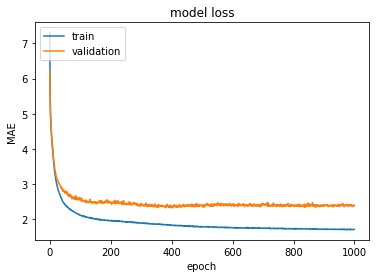

In [38]:
import matplotlib.pyplot as plt
print(history.history.keys())
'''
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''
# summarize history for loss
fig,ax= plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig.savefig("model_loss.png",format="png",dpi=1000)

In [39]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=Adam(lr=0.01,decay=1e-5),
              loss='mae',
              metrics=['mae', 'acc'],
                batch=200)

history_5=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
evaluation=model.evaluate(validation_x, validation_y)

Train on 4502 samples, validate on 563 samples
Epoch 1/1000
4502/4502 [==============================] - 5s 1ms/step - loss: 5.3671 - mean_absolute_error: 5.3671 - acc: 0.0000e+00 - val_loss: 4.3389 - val_mean_absolute_error: 4.3389 - val_acc: 0.0000e+00
Epoch 2/1000
4502/4502 [==============================] - 0s 108us/step - loss: 4.0927 - mean_absolute_error: 4.0927 - acc: 0.0000e+00 - val_loss: 3.7734 - val_mean_absolute_error: 3.7734 - val_acc: 0.0000e+00
Epoch 3/1000
4502/4502 [==============================] - 0s 97us/step - loss: 3.6939 - mean_absolute_error: 3.6939 - acc: 0.0000e+00 - val_loss: 3.6270 - val_mean_absolute_error: 3.6270 - val_acc: 0.0000e+00
Epoch 4/1000
4502/4502 [==============================] - 0s 96us/step - loss: 3.3768 - mean_absolute_error: 3.3768 - acc: 0.0000e+00 - val_loss: 3.3755 - val_mean_absolute_error: 3.3755 - val_acc: 0.0000e+00
Epoch 5/1000
4502/4502 [==============================] - 0s 92us/step - loss: 3.2038 - mean_absolute_error: 3.2038 -

Epoch 40/1000
4502/4502 [==============================] - 1s 162us/step - loss: 1.5184 - mean_absolute_error: 1.5184 - acc: 0.0000e+00 - val_loss: 2.5077 - val_mean_absolute_error: 2.5077 - val_acc: 0.0000e+00
Epoch 41/1000
4502/4502 [==============================] - 1s 111us/step - loss: 1.5346 - mean_absolute_error: 1.5346 - acc: 0.0000e+00 - val_loss: 2.5226 - val_mean_absolute_error: 2.5226 - val_acc: 0.0000e+00
Epoch 42/1000
4502/4502 [==============================] - 0s 100us/step - loss: 1.4836 - mean_absolute_error: 1.4836 - acc: 0.0000e+00 - val_loss: 2.3604 - val_mean_absolute_error: 2.3604 - val_acc: 0.0000e+00
Epoch 43/1000
4502/4502 [==============================] - 0s 89us/step - loss: 1.4631 - mean_absolute_error: 1.4631 - acc: 0.0000e+00 - val_loss: 2.5387 - val_mean_absolute_error: 2.5387 - val_acc: 0.0000e+00
Epoch 44/1000
4502/4502 [==============================] - 1s 164us/step - loss: 1.4324 - mean_absolute_error: 1.4324 - acc: 0.0000e+00 - val_loss: 2.3641 - 

Epoch 79/1000
4502/4502 [==============================] - 0s 93us/step - loss: 1.1548 - mean_absolute_error: 1.1548 - acc: 0.0000e+00 - val_loss: 2.3118 - val_mean_absolute_error: 2.3118 - val_acc: 0.0000e+00
Epoch 80/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.1571 - mean_absolute_error: 1.1571 - acc: 0.0000e+00 - val_loss: 2.3589 - val_mean_absolute_error: 2.3589 - val_acc: 0.0000e+00
Epoch 81/1000
4502/4502 [==============================] - 1s 136us/step - loss: 1.1236 - mean_absolute_error: 1.1236 - acc: 0.0000e+00 - val_loss: 2.4014 - val_mean_absolute_error: 2.4014 - val_acc: 0.0000e+00
Epoch 82/1000
4502/4502 [==============================] - 1s 149us/step - loss: 1.1817 - mean_absolute_error: 1.1817 - acc: 0.0000e+00 - val_loss: 2.5017 - val_mean_absolute_error: 2.5017 - val_acc: 0.0000e+00
Epoch 83/1000
4502/4502 [==============================] - 1s 148us/step - loss: 1.1916 - mean_absolute_error: 1.1916 - acc: 0.0000e+00 - val_loss: 2.3015 - v

Epoch 118/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.9938 - mean_absolute_error: 0.9938 - acc: 0.0000e+00 - val_loss: 2.4027 - val_mean_absolute_error: 2.4027 - val_acc: 0.0000e+00
Epoch 119/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.9960 - mean_absolute_error: 0.9960 - acc: 0.0000e+00 - val_loss: 2.3934 - val_mean_absolute_error: 2.3934 - val_acc: 0.0000e+00
Epoch 120/1000
4502/4502 [==============================] - 0s 92us/step - loss: 0.9616 - mean_absolute_error: 0.9616 - acc: 0.0000e+00 - val_loss: 2.3162 - val_mean_absolute_error: 2.3162 - val_acc: 0.0000e+00
Epoch 121/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.0047 - mean_absolute_error: 1.0047 - acc: 0.0000e+00 - val_loss: 2.3117 - val_mean_absolute_error: 2.3117 - val_acc: 0.0000e+00
Epoch 122/1000
4502/4502 [==============================] - 0s 93us/step - loss: 0.9954 - mean_absolute_error: 0.9954 - acc: 0.0000e+00 - val_loss: 2.3382 -

Epoch 157/1000
4502/4502 [==============================] - 0s 93us/step - loss: 0.8900 - mean_absolute_error: 0.8900 - acc: 0.0000e+00 - val_loss: 2.4162 - val_mean_absolute_error: 2.4162 - val_acc: 0.0000e+00
Epoch 158/1000
4502/4502 [==============================] - 0s 91us/step - loss: 0.8975 - mean_absolute_error: 0.8975 - acc: 0.0000e+00 - val_loss: 2.3570 - val_mean_absolute_error: 2.3570 - val_acc: 0.0000e+00
Epoch 159/1000
4502/4502 [==============================] - 0s 89us/step - loss: 0.9111 - mean_absolute_error: 0.9111 - acc: 0.0000e+00 - val_loss: 2.3866 - val_mean_absolute_error: 2.3866 - val_acc: 0.0000e+00
Epoch 160/1000
4502/4502 [==============================] - 0s 103us/step - loss: 0.8960 - mean_absolute_error: 0.8960 - acc: 0.0000e+00 - val_loss: 2.3655 - val_mean_absolute_error: 2.3655 - val_acc: 0.0000e+00
Epoch 161/1000
4502/4502 [==============================] - 0s 89us/step - loss: 0.8972 - mean_absolute_error: 0.8972 - acc: 0.0000e+00 - val_loss: 2.2717 

Epoch 196/1000
4502/4502 [==============================] - 0s 107us/step - loss: 0.8519 - mean_absolute_error: 0.8519 - acc: 0.0000e+00 - val_loss: 2.3532 - val_mean_absolute_error: 2.3532 - val_acc: 0.0000e+00
Epoch 197/1000
4502/4502 [==============================] - 0s 93us/step - loss: 0.8415 - mean_absolute_error: 0.8415 - acc: 0.0000e+00 - val_loss: 2.3991 - val_mean_absolute_error: 2.3991 - val_acc: 0.0000e+00
Epoch 198/1000
4502/4502 [==============================] - 0s 98us/step - loss: 0.7985 - mean_absolute_error: 0.7985 - acc: 0.0000e+00 - val_loss: 2.3339 - val_mean_absolute_error: 2.3339 - val_acc: 0.0000e+00
Epoch 199/1000
4502/4502 [==============================] - 0s 103us/step - loss: 0.8360 - mean_absolute_error: 0.8360 - acc: 0.0000e+00 - val_loss: 2.3420 - val_mean_absolute_error: 2.3420 - val_acc: 0.0000e+00
Epoch 200/1000
4502/4502 [==============================] - 0s 98us/step - loss: 0.8140 - mean_absolute_error: 0.8140 - acc: 0.0000e+00 - val_loss: 2.3369

Epoch 235/1000
4502/4502 [==============================] - 0s 95us/step - loss: 0.7936 - mean_absolute_error: 0.7936 - acc: 0.0000e+00 - val_loss: 2.4032 - val_mean_absolute_error: 2.4032 - val_acc: 0.0000e+00
Epoch 236/1000
4502/4502 [==============================] - 0s 105us/step - loss: 0.7849 - mean_absolute_error: 0.7849 - acc: 0.0000e+00 - val_loss: 2.3983 - val_mean_absolute_error: 2.3983 - val_acc: 0.0000e+00
Epoch 237/1000
4502/4502 [==============================] - 1s 115us/step - loss: 0.7983 - mean_absolute_error: 0.7983 - acc: 0.0000e+00 - val_loss: 2.3692 - val_mean_absolute_error: 2.3692 - val_acc: 0.0000e+00
Epoch 238/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.7815 - mean_absolute_error: 0.7815 - acc: 0.0000e+00 - val_loss: 2.4136 - val_mean_absolute_error: 2.4136 - val_acc: 0.0000e+00
Epoch 239/1000
4502/4502 [==============================] - 0s 100us/step - loss: 0.7714 - mean_absolute_error: 0.7714 - acc: 0.0000e+00 - val_loss: 2.410

Epoch 274/1000
4502/4502 [==============================] - 0s 92us/step - loss: 0.7455 - mean_absolute_error: 0.7455 - acc: 0.0000e+00 - val_loss: 2.4155 - val_mean_absolute_error: 2.4155 - val_acc: 0.0000e+00
Epoch 275/1000
4502/4502 [==============================] - 0s 104us/step - loss: 0.7336 - mean_absolute_error: 0.7336 - acc: 0.0000e+00 - val_loss: 2.3885 - val_mean_absolute_error: 2.3885 - val_acc: 0.0000e+00
Epoch 276/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.7271 - mean_absolute_error: 0.7271 - acc: 0.0000e+00 - val_loss: 2.3900 - val_mean_absolute_error: 2.3900 - val_acc: 0.0000e+00
Epoch 277/1000
4502/4502 [==============================] - 0s 98us/step - loss: 0.7817 - mean_absolute_error: 0.7817 - acc: 0.0000e+00 - val_loss: 2.4871 - val_mean_absolute_error: 2.4871 - val_acc: 0.0000e+00
Epoch 278/1000
4502/4502 [==============================] - 0s 95us/step - loss: 0.7593 - mean_absolute_error: 0.7593 - acc: 0.0000e+00 - val_loss: 2.4308 

Epoch 313/1000
4502/4502 [==============================] - 1s 138us/step - loss: 0.7107 - mean_absolute_error: 0.7107 - acc: 0.0000e+00 - val_loss: 2.4254 - val_mean_absolute_error: 2.4254 - val_acc: 0.0000e+00
Epoch 314/1000
4502/4502 [==============================] - 1s 116us/step - loss: 0.7245 - mean_absolute_error: 0.7245 - acc: 0.0000e+00 - val_loss: 2.4256 - val_mean_absolute_error: 2.4256 - val_acc: 0.0000e+00
Epoch 315/1000
4502/4502 [==============================] - 1s 144us/step - loss: 0.7169 - mean_absolute_error: 0.7169 - acc: 0.0000e+00 - val_loss: 2.4776 - val_mean_absolute_error: 2.4776 - val_acc: 0.0000e+00
Epoch 316/1000
4502/4502 [==============================] - 1s 170us/step - loss: 0.7199 - mean_absolute_error: 0.7199 - acc: 0.0000e+00 - val_loss: 2.3979 - val_mean_absolute_error: 2.3979 - val_acc: 0.0000e+00
Epoch 317/1000
4502/4502 [==============================] - 1s 129us/step - loss: 0.7216 - mean_absolute_error: 0.7216 - acc: 0.0000e+00 - val_loss: 2.4

Epoch 352/1000
4502/4502 [==============================] - 0s 102us/step - loss: 0.6585 - mean_absolute_error: 0.6585 - acc: 0.0000e+00 - val_loss: 2.4731 - val_mean_absolute_error: 2.4731 - val_acc: 0.0000e+00
Epoch 353/1000
4502/4502 [==============================] - 0s 99us/step - loss: 0.6990 - mean_absolute_error: 0.6990 - acc: 0.0000e+00 - val_loss: 2.4187 - val_mean_absolute_error: 2.4187 - val_acc: 0.0000e+00
Epoch 354/1000
4502/4502 [==============================] - 0s 93us/step - loss: 0.6634 - mean_absolute_error: 0.6634 - acc: 0.0000e+00 - val_loss: 2.4225 - val_mean_absolute_error: 2.4225 - val_acc: 0.0000e+00
Epoch 355/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.6635 - mean_absolute_error: 0.6635 - acc: 0.0000e+00 - val_loss: 2.4096 - val_mean_absolute_error: 2.4096 - val_acc: 0.0000e+00
Epoch 356/1000
4502/4502 [==============================] - 0s 97us/step - loss: 0.6841 - mean_absolute_error: 0.6841 - acc: 0.0000e+00 - val_loss: 2.4530 

Epoch 391/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.6702 - mean_absolute_error: 0.6702 - acc: 0.0000e+00 - val_loss: 2.4664 - val_mean_absolute_error: 2.4664 - val_acc: 0.0000e+00
Epoch 392/1000
4502/4502 [==============================] - 0s 102us/step - loss: 0.6509 - mean_absolute_error: 0.6509 - acc: 0.0000e+00 - val_loss: 2.4306 - val_mean_absolute_error: 2.4306 - val_acc: 0.0000e+00
Epoch 393/1000
4502/4502 [==============================] - 0s 99us/step - loss: 0.6555 - mean_absolute_error: 0.6555 - acc: 0.0000e+00 - val_loss: 2.4782 - val_mean_absolute_error: 2.4782 - val_acc: 0.0000e+00
Epoch 394/1000
4502/4502 [==============================] - 0s 102us/step - loss: 0.6702 - mean_absolute_error: 0.6702 - acc: 0.0000e+00 - val_loss: 2.4523 - val_mean_absolute_error: 2.4523 - val_acc: 0.0000e+00
Epoch 395/1000
4502/4502 [==============================] - 0s 99us/step - loss: 0.6891 - mean_absolute_error: 0.6891 - acc: 0.0000e+00 - val_loss: 2.4208

Epoch 430/1000
4502/4502 [==============================] - 0s 96us/step - loss: 0.6494 - mean_absolute_error: 0.6494 - acc: 0.0000e+00 - val_loss: 2.5059 - val_mean_absolute_error: 2.5059 - val_acc: 0.0000e+00
Epoch 431/1000
4502/4502 [==============================] - 0s 95us/step - loss: 0.6151 - mean_absolute_error: 0.6151 - acc: 0.0000e+00 - val_loss: 2.4782 - val_mean_absolute_error: 2.4782 - val_acc: 0.0000e+00
Epoch 432/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.6349 - mean_absolute_error: 0.6349 - acc: 0.0000e+00 - val_loss: 2.4047 - val_mean_absolute_error: 2.4047 - val_acc: 0.0000e+00
Epoch 433/1000
4502/4502 [==============================] - 0s 96us/step - loss: 0.6340 - mean_absolute_error: 0.6340 - acc: 0.0000e+00 - val_loss: 2.4603 - val_mean_absolute_error: 2.4603 - val_acc: 0.0000e+00
Epoch 434/1000
4502/4502 [==============================] - 0s 93us/step - loss: 0.6288 - mean_absolute_error: 0.6288 - acc: 0.0000e+00 - val_loss: 2.3930 -

Epoch 469/1000
4502/4502 [==============================] - 0s 92us/step - loss: 0.6013 - mean_absolute_error: 0.6013 - acc: 0.0000e+00 - val_loss: 2.4327 - val_mean_absolute_error: 2.4327 - val_acc: 0.0000e+00
Epoch 470/1000
4502/4502 [==============================] - 0s 93us/step - loss: 0.6206 - mean_absolute_error: 0.6206 - acc: 0.0000e+00 - val_loss: 2.4275 - val_mean_absolute_error: 2.4275 - val_acc: 0.0000e+00
Epoch 471/1000
4502/4502 [==============================] - 0s 91us/step - loss: 0.5818 - mean_absolute_error: 0.5818 - acc: 0.0000e+00 - val_loss: 2.4151 - val_mean_absolute_error: 2.4151 - val_acc: 0.0000e+00
Epoch 472/1000
4502/4502 [==============================] - 0s 91us/step - loss: 0.5968 - mean_absolute_error: 0.5968 - acc: 0.0000e+00 - val_loss: 2.4262 - val_mean_absolute_error: 2.4262 - val_acc: 0.0000e+00
Epoch 473/1000
4502/4502 [==============================] - 0s 95us/step - loss: 0.6024 - mean_absolute_error: 0.6024 - acc: 0.0000e+00 - val_loss: 2.4285 -

Epoch 508/1000
4502/4502 [==============================] - 0s 105us/step - loss: 0.5879 - mean_absolute_error: 0.5879 - acc: 0.0000e+00 - val_loss: 2.4810 - val_mean_absolute_error: 2.4810 - val_acc: 0.0000e+00
Epoch 509/1000
4502/4502 [==============================] - 1s 113us/step - loss: 0.6034 - mean_absolute_error: 0.6034 - acc: 0.0000e+00 - val_loss: 2.4615 - val_mean_absolute_error: 2.4615 - val_acc: 0.0000e+00
Epoch 510/1000
4502/4502 [==============================] - 1s 115us/step - loss: 0.5832 - mean_absolute_error: 0.5832 - acc: 0.0000e+00 - val_loss: 2.4801 - val_mean_absolute_error: 2.4801 - val_acc: 0.0000e+00
Epoch 511/1000
4502/4502 [==============================] - 1s 113us/step - loss: 0.5848 - mean_absolute_error: 0.5848 - acc: 0.0000e+00 - val_loss: 2.4803 - val_mean_absolute_error: 2.4803 - val_acc: 0.0000e+00
Epoch 512/1000
4502/4502 [==============================] - 0s 105us/step - loss: 0.6063 - mean_absolute_error: 0.6063 - acc: 0.0000e+00 - val_loss: 2.4

4502/4502 [==============================] - 0s 96us/step - loss: 0.5697 - mean_absolute_error: 0.5697 - acc: 0.0000e+00 - val_loss: 2.4534 - val_mean_absolute_error: 2.4534 - val_acc: 0.0000e+00
Epoch 547/1000
4502/4502 [==============================] - 0s 96us/step - loss: 0.5701 - mean_absolute_error: 0.5701 - acc: 0.0000e+00 - val_loss: 2.4466 - val_mean_absolute_error: 2.4466 - val_acc: 0.0000e+00
Epoch 548/1000
4502/4502 [==============================] - 0s 100us/step - loss: 0.5915 - mean_absolute_error: 0.5915 - acc: 0.0000e+00 - val_loss: 2.5032 - val_mean_absolute_error: 2.5032 - val_acc: 0.0000e+00
Epoch 549/1000
4502/4502 [==============================] - 0s 110us/step - loss: 0.5858 - mean_absolute_error: 0.5858 - acc: 0.0000e+00 - val_loss: 2.5080 - val_mean_absolute_error: 2.5080 - val_acc: 0.0000e+00
Epoch 550/1000
4502/4502 [==============================] - 0s 92us/step - loss: 0.5766 - mean_absolute_error: 0.5766 - acc: 0.0000e+00 - val_loss: 2.4848 - val_mean_abs

Epoch 585/1000
4502/4502 [==============================] - 0s 100us/step - loss: 0.5580 - mean_absolute_error: 0.5580 - acc: 0.0000e+00 - val_loss: 2.4301 - val_mean_absolute_error: 2.4301 - val_acc: 0.0000e+00
Epoch 586/1000
4502/4502 [==============================] - 0s 104us/step - loss: 0.5773 - mean_absolute_error: 0.5773 - acc: 0.0000e+00 - val_loss: 2.4584 - val_mean_absolute_error: 2.4584 - val_acc: 0.0000e+00
Epoch 587/1000
4502/4502 [==============================] - 0s 99us/step - loss: 0.5793 - mean_absolute_error: 0.5793 - acc: 0.0000e+00 - val_loss: 2.4003 - val_mean_absolute_error: 2.4003 - val_acc: 0.0000e+00
Epoch 588/1000
4502/4502 [==============================] - 0s 97us/step - loss: 0.5587 - mean_absolute_error: 0.5587 - acc: 0.0000e+00 - val_loss: 2.4548 - val_mean_absolute_error: 2.4548 - val_acc: 0.0000e+00
Epoch 589/1000
4502/4502 [==============================] - 0s 96us/step - loss: 0.5379 - mean_absolute_error: 0.5379 - acc: 0.0000e+00 - val_loss: 2.4208

Epoch 624/1000
4502/4502 [==============================] - 0s 92us/step - loss: 0.5357 - mean_absolute_error: 0.5357 - acc: 0.0000e+00 - val_loss: 2.4328 - val_mean_absolute_error: 2.4328 - val_acc: 0.0000e+00
Epoch 625/1000
4502/4502 [==============================] - 0s 101us/step - loss: 0.5327 - mean_absolute_error: 0.5327 - acc: 0.0000e+00 - val_loss: 2.4392 - val_mean_absolute_error: 2.4392 - val_acc: 0.0000e+00
Epoch 626/1000
4502/4502 [==============================] - 0s 91us/step - loss: 0.5563 - mean_absolute_error: 0.5563 - acc: 0.0000e+00 - val_loss: 2.4557 - val_mean_absolute_error: 2.4557 - val_acc: 0.0000e+00
Epoch 627/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.5495 - mean_absolute_error: 0.5495 - acc: 0.0000e+00 - val_loss: 2.4522 - val_mean_absolute_error: 2.4522 - val_acc: 0.0000e+00
Epoch 628/1000
4502/4502 [==============================] - 0s 92us/step - loss: 0.5498 - mean_absolute_error: 0.5498 - acc: 0.0000e+00 - val_loss: 2.4499 

Epoch 663/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.5206 - mean_absolute_error: 0.5206 - acc: 0.0000e+00 - val_loss: 2.5093 - val_mean_absolute_error: 2.5093 - val_acc: 0.0000e+00
Epoch 664/1000
4502/4502 [==============================] - 0s 69us/step - loss: 0.5536 - mean_absolute_error: 0.5536 - acc: 0.0000e+00 - val_loss: 2.4430 - val_mean_absolute_error: 2.4430 - val_acc: 0.0000e+00
Epoch 665/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.5362 - mean_absolute_error: 0.5362 - acc: 0.0000e+00 - val_loss: 2.4479 - val_mean_absolute_error: 2.4479 - val_acc: 0.0000e+00
Epoch 666/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.5363 - mean_absolute_error: 0.5363 - acc: 0.0000e+00 - val_loss: 2.4658 - val_mean_absolute_error: 2.4658 - val_acc: 0.0000e+00
Epoch 667/1000
4502/4502 [==============================] - 0s 69us/step - loss: 0.5424 - mean_absolute_error: 0.5424 - acc: 0.0000e+00 - val_loss: 2.4932 -

Epoch 702/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.5412 - mean_absolute_error: 0.5412 - acc: 0.0000e+00 - val_loss: 2.4506 - val_mean_absolute_error: 2.4506 - val_acc: 0.0000e+00
Epoch 703/1000
4502/4502 [==============================] - 0s 75us/step - loss: 0.5256 - mean_absolute_error: 0.5256 - acc: 0.0000e+00 - val_loss: 2.4533 - val_mean_absolute_error: 2.4533 - val_acc: 0.0000e+00
Epoch 704/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.5249 - mean_absolute_error: 0.5249 - acc: 0.0000e+00 - val_loss: 2.4888 - val_mean_absolute_error: 2.4888 - val_acc: 0.0000e+00
Epoch 705/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.5247 - mean_absolute_error: 0.5247 - acc: 0.0000e+00 - val_loss: 2.4758 - val_mean_absolute_error: 2.4758 - val_acc: 0.0000e+00
Epoch 706/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.5279 - mean_absolute_error: 0.5279 - acc: 0.0000e+00 - val_loss: 2.4701 -

Epoch 741/1000
4502/4502 [==============================] - 0s 79us/step - loss: 0.4972 - mean_absolute_error: 0.4972 - acc: 0.0000e+00 - val_loss: 2.5055 - val_mean_absolute_error: 2.5055 - val_acc: 0.0000e+00
Epoch 742/1000
4502/4502 [==============================] - 0s 77us/step - loss: 0.4974 - mean_absolute_error: 0.4974 - acc: 0.0000e+00 - val_loss: 2.4625 - val_mean_absolute_error: 2.4625 - val_acc: 0.0000e+00
Epoch 743/1000
4502/4502 [==============================] - 0s 77us/step - loss: 0.5115 - mean_absolute_error: 0.5115 - acc: 0.0000e+00 - val_loss: 2.4835 - val_mean_absolute_error: 2.4835 - val_acc: 0.0000e+00
Epoch 744/1000
4502/4502 [==============================] - 0s 75us/step - loss: 0.5179 - mean_absolute_error: 0.5179 - acc: 0.0000e+00 - val_loss: 2.4450 - val_mean_absolute_error: 2.4450 - val_acc: 0.0000e+00
Epoch 745/1000
4502/4502 [==============================] - 0s 76us/step - loss: 0.5212 - mean_absolute_error: 0.5212 - acc: 0.0000e+00 - val_loss: 2.4583 -

Epoch 780/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.5017 - mean_absolute_error: 0.5017 - acc: 0.0000e+00 - val_loss: 2.4550 - val_mean_absolute_error: 2.4550 - val_acc: 0.0000e+00
Epoch 781/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.4953 - mean_absolute_error: 0.4953 - acc: 0.0000e+00 - val_loss: 2.4733 - val_mean_absolute_error: 2.4733 - val_acc: 0.0000e+00
Epoch 782/1000
4502/4502 [==============================] - 0s 80us/step - loss: 0.4843 - mean_absolute_error: 0.4843 - acc: 0.0000e+00 - val_loss: 2.4691 - val_mean_absolute_error: 2.4691 - val_acc: 0.0000e+00
Epoch 783/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.4985 - mean_absolute_error: 0.4985 - acc: 0.0000e+00 - val_loss: 2.4517 - val_mean_absolute_error: 2.4517 - val_acc: 0.0000e+00
Epoch 784/1000
4502/4502 [==============================] - 0s 69us/step - loss: 0.4905 - mean_absolute_error: 0.4905 - acc: 0.0000e+00 - val_loss: 2.4371 -

Epoch 819/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.5010 - mean_absolute_error: 0.5010 - acc: 0.0000e+00 - val_loss: 2.4741 - val_mean_absolute_error: 2.4741 - val_acc: 0.0000e+00
Epoch 820/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.5029 - mean_absolute_error: 0.5029 - acc: 0.0000e+00 - val_loss: 2.4726 - val_mean_absolute_error: 2.4726 - val_acc: 0.0000e+00
Epoch 821/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.4830 - mean_absolute_error: 0.4830 - acc: 0.0000e+00 - val_loss: 2.4618 - val_mean_absolute_error: 2.4618 - val_acc: 0.0000e+00
Epoch 822/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.4923 - mean_absolute_error: 0.4923 - acc: 0.0000e+00 - val_loss: 2.4944 - val_mean_absolute_error: 2.4944 - val_acc: 0.0000e+00
Epoch 823/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.4956 - mean_absolute_error: 0.4956 - acc: 0.0000e+00 - val_loss: 2.4866 -

Epoch 858/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.4806 - mean_absolute_error: 0.4806 - acc: 0.0000e+00 - val_loss: 2.4847 - val_mean_absolute_error: 2.4847 - val_acc: 0.0000e+00
Epoch 859/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.4794 - mean_absolute_error: 0.4794 - acc: 0.0000e+00 - val_loss: 2.4875 - val_mean_absolute_error: 2.4875 - val_acc: 0.0000e+00
Epoch 860/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.4993 - mean_absolute_error: 0.4993 - acc: 0.0000e+00 - val_loss: 2.4695 - val_mean_absolute_error: 2.4695 - val_acc: 0.0000e+00
Epoch 861/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.4974 - mean_absolute_error: 0.4974 - acc: 0.0000e+00 - val_loss: 2.4661 - val_mean_absolute_error: 2.4661 - val_acc: 0.0000e+00
Epoch 862/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.4922 - mean_absolute_error: 0.4922 - acc: 0.0000e+00 - val_loss: 2.5088 -

Epoch 897/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.4881 - mean_absolute_error: 0.4881 - acc: 0.0000e+00 - val_loss: 2.4957 - val_mean_absolute_error: 2.4957 - val_acc: 0.0000e+00
Epoch 898/1000
4502/4502 [==============================] - 0s 69us/step - loss: 0.4798 - mean_absolute_error: 0.4798 - acc: 0.0000e+00 - val_loss: 2.4889 - val_mean_absolute_error: 2.4889 - val_acc: 0.0000e+00
Epoch 899/1000
4502/4502 [==============================] - 0s 76us/step - loss: 0.4693 - mean_absolute_error: 0.4693 - acc: 0.0000e+00 - val_loss: 2.4621 - val_mean_absolute_error: 2.4621 - val_acc: 0.0000e+00
Epoch 900/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.4782 - mean_absolute_error: 0.4782 - acc: 0.0000e+00 - val_loss: 2.4586 - val_mean_absolute_error: 2.4586 - val_acc: 0.0000e+00
Epoch 901/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.5095 - mean_absolute_error: 0.5095 - acc: 0.0000e+00 - val_loss: 2.5016 -

Epoch 936/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.4612 - mean_absolute_error: 0.4612 - acc: 0.0000e+00 - val_loss: 2.5228 - val_mean_absolute_error: 2.5228 - val_acc: 0.0000e+00
Epoch 937/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.4709 - mean_absolute_error: 0.4709 - acc: 0.0000e+00 - val_loss: 2.4879 - val_mean_absolute_error: 2.4879 - val_acc: 0.0000e+00
Epoch 938/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.4710 - mean_absolute_error: 0.4710 - acc: 0.0000e+00 - val_loss: 2.4701 - val_mean_absolute_error: 2.4701 - val_acc: 0.0000e+00
Epoch 939/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.4887 - mean_absolute_error: 0.4887 - acc: 0.0000e+00 - val_loss: 2.4875 - val_mean_absolute_error: 2.4875 - val_acc: 0.0000e+00
Epoch 940/1000
4502/4502 [==============================] - 0s 76us/step - loss: 0.4624 - mean_absolute_error: 0.4624 - acc: 0.0000e+00 - val_loss: 2.4983 -

Epoch 975/1000
4502/4502 [==============================] - 0s 76us/step - loss: 0.4525 - mean_absolute_error: 0.4525 - acc: 0.0000e+00 - val_loss: 2.4932 - val_mean_absolute_error: 2.4932 - val_acc: 0.0000e+00
Epoch 976/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.4509 - mean_absolute_error: 0.4509 - acc: 0.0000e+00 - val_loss: 2.5148 - val_mean_absolute_error: 2.5148 - val_acc: 0.0000e+00
Epoch 977/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.4718 - mean_absolute_error: 0.4718 - acc: 0.0000e+00 - val_loss: 2.5107 - val_mean_absolute_error: 2.5107 - val_acc: 0.0000e+00
Epoch 978/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.4572 - mean_absolute_error: 0.4572 - acc: 0.0000e+00 - val_loss: 2.4919 - val_mean_absolute_error: 2.4919 - val_acc: 0.0000e+00
Epoch 979/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.4735 - mean_absolute_error: 0.4735 - acc: 0.0000e+00 - val_loss: 2.5170 -

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


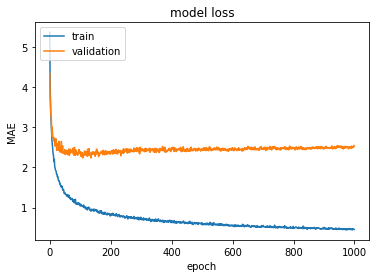

In [40]:
import matplotlib.pyplot as plt
print(history.history.keys())
'''
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''
# summarize history for loss
fig,ax= plt.subplots()
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig.savefig("model_loss.png",format="png",dpi=1000)